# Post-Ride Survey Analysis

### -------------------------------------

# Findings Summary
I created a graph which shows the average scores that the users gave as 'Feedback' at 6 different places along the route in the AV. The graph shows a large difference between the users' experience mid-ride with Julie and Lily at Feedback #3 even though most of the other Feedback instances were pretty similar. This would be interesting to dig into to see what caused the large gap between users' experience at Feedback #3. 

I used the Mann-Whitney U test on the appropriate columns. There were no other significant differences between the question results for Julie and Lily users. 

One question I have is why does Julie score higher on so many of the questions, yet for some pretty significant questions Lily scores higher? For example, the only two questions that Lily scored higher than Julie were the following two questions: 

* "How friendly did you feel the autonomous vehicle was?"

* "How likely are you to ride an atonomous vehicle again?"

These seem like pretty important questions! I wonder what made it such that the users seem to have a better experience with Julie but consider Lily to be 'friendlier' and would be more likely to ride an AV because of Lily. 

### -------------------------------------

## EDA

In [32]:
import pandas as pd
import numpy as np

In [33]:
data = pd.read_csv('postridecsv.csv')
data.shape

(27, 21)

In [34]:
data.head()
# no NAs

,Timestamp,Intervention,Use?,Name,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6,...,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?
0,"Tuesday, July 17, 2018",Julie,YES,Babak,1,1,1,0,0,0,...,7,4,3,3,3,4,7,7,5,7
1,"Thursday, July 19, 2018",Lily,Maybe; Semi-autonomous,Chris,1,0,0,0,0,0,...,8,2,3,2,3,3,7,7,10,10
2,"Monday, July 23, 2018",Julie,"Maybe--Wondered if she was being ""punked""; Sem...",Kristin,1,0,1,0,1,1,...,7,4,0,0,3,4,7,7,6,8
3,"Friday, July 27, 2018",Lily,YES,Danny,1,1,1,1,1,1,...,10,4,4,4,3,4,10,10,5,10
4,"Monday, July 30, 2018",Julie,NO; knew this was not an AV and filled out the...,Aaron,1,-1,1,1,1,1,...,7,2,3,3,3,3,8,7,5,7


### Take out those who were aware of survey subtleties

In [35]:
data = data[data["Use?"].str.startswith("Y")]
data.shape

(22, 21)

## Summary Tables

#### Questions regarding the users' experience

In [36]:
temp = data.drop(data.columns[0], axis = 1)
temp = temp.drop(temp.columns[1:10], axis = 1)
temp.head()

,Intervention,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?
0,Julie,7,4,3,3,3,4,7,7,5,7
3,Lily,10,4,4,4,3,4,10,10,5,10
5,Julie,6,4,3,2,4,4,5,7,3,7
6,Julie,8,4,4,4,4,4,8,9,9,10
7,Lily,9,2,4,3,4,4,7,7,5,10


In [37]:
temp.groupby("Intervention").mean()

,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?
Intervention,,,,,,,,,,
Julie,7.727273,4.090909,3.909091,3.545455,3.909091,4.181818,7.727273,7.454545,6.727273,8.454545
Lily,7.545455,3.090909,3.363636,3.181818,3.636364,3.909091,7.272727,7.727273,5.909091,9.090909


Julie scored higher on 8 of these 10 questions. 

Lily scored higher than Julie for the questions:

* "How friendly did you feel the autonomous vehicle was?"

* "How likely are you to ride an atonomous vehicle again?"

### Feedback scores

In [38]:
feedback = data.drop(data.columns[10:], axis = 1)
feedback = feedback.drop(feedback.columns[[0,2,3]], axis = 1)

In [39]:
feedback_sum_by_Intervention = feedback.groupby("Intervention").sum()
feedback_sum_by_Intervention
feedback_avg_by_Intervention = feedback.groupby("Intervention").mean()
feedback_avg_by_Intervention

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6
Intervention,,,,,,
Julie,0.909091,0.636364,0.818182,0.727273,0.545455,0.818182
Lily,0.818182,0.454545,0.363636,0.636364,0.545455,0.818182


In [40]:
feedback_sum = feedback.assign(SumFeedback = feedback[feedback.columns[1:8]].sum(axis = 1))
#data2 = data2.assign(Conf_Score = data2[list(data2)[7:10]].sum(axis = 1))

### Plot the Feedback Scores

In [80]:
import matplotlib.pyplot as plt

In [81]:
feedback_avg_by_Intervention

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6
Intervention,,,,,,
Julie,0.909091,0.636364,0.818182,0.727273,0.545455,0.818182
Lily,0.818182,0.454545,0.363636,0.636364,0.545455,0.818182


Text(0.5,0,'Location in Course')

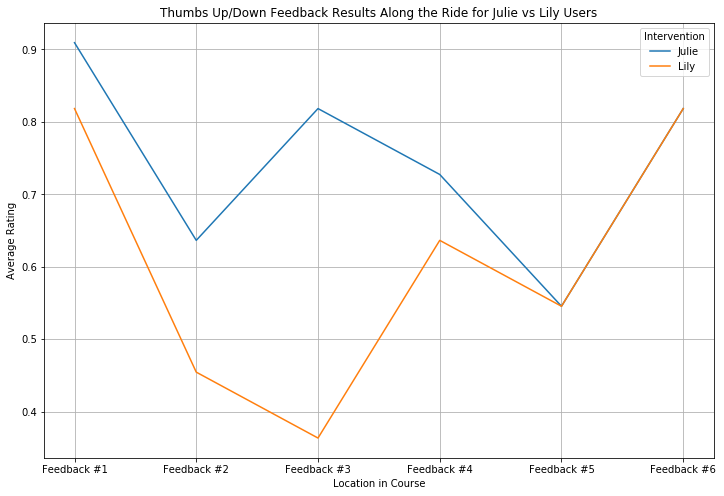

In [82]:
temp1 = feedback_avg_by_Intervention.T
plot1 = temp1.plot(figsize = [12,8], grid = True, use_index = True, xticks = np.arange(0, 6, 1), 
          title = "Thumbs Up/Down Feedback Results Along the Ride for Julie vs Lily Users")
plot1.set_ylabel("Average Rating")
plot1.set_xlabel("Location in Course")

This plot shows someting interesting. In the 'Feedback' questions where users were asked mid-ride to evaluate how the digital assistant was doing, Julie scores surprisingly significantly higher than Lily on the 3rd evaluation. 

The Feedback Question #3 was asked immediately after the 2nd stressor point - when the digital assistant calcualted a route that ran into a roadblock. The users who had Julie seem to appreciate how she responded and corrected moreso than Lily's users. 

### Within Cohort Variance

In [44]:
feedback_var_by_Intervention = feedback.groupby("Intervention").var()
feedback_var_by_Intervention

,Feedback #1,Feedback #2,Feedback #3,Feedback #4,Feedback #5,Feedback #6
Intervention,,,,,,
Julie,0.090909,0.254545,0.163636,0.218182,0.472727,0.163636
Lily,0.163636,0.272727,0.454545,0.254545,0.272727,0.163636


In [65]:
variance_within_group = temp.groupby("Intervention").var()
variance_within_group

,Please rate your overall experience of riding the autonomous vehicle,It operated as expected,It seems trustworthy,It was comforting,It will drive more safely than other human drivers,It is recommendable to others,How comfortable were you in the autonomous vehicle,How friendly did you feel the autonomous vehicle was?,How safe did you feel in the autonomous vehicle?,How likely are you to ride an autonomous vehicle again?
Intervention,,,,,,,,,,
Julie,1.418182,0.490909,0.690909,0.672727,0.490909,0.563636,2.818182,3.472727,6.418182,2.272727
Lily,4.472727,1.090909,1.454545,0.563636,0.654545,0.690909,3.418182,1.818182,2.690909,1.890909


The variance of responses between user groups seems to differ. 

Here's some boxplots of those with the largest difference in variance.

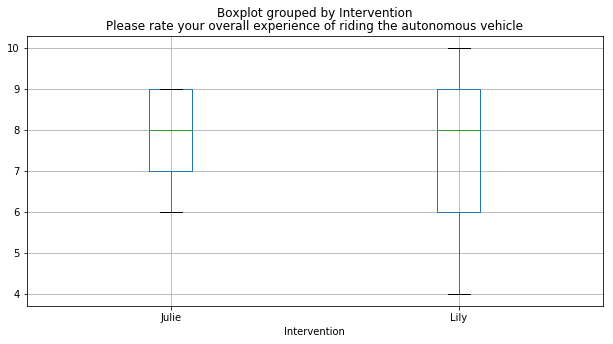

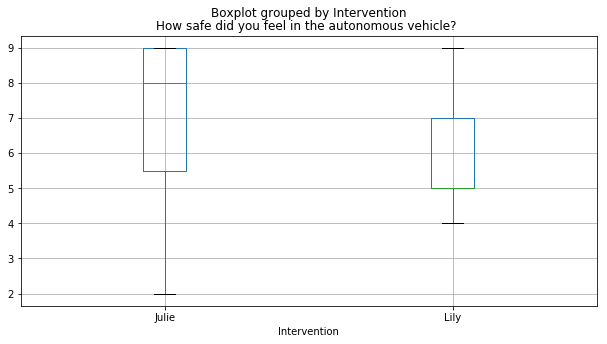

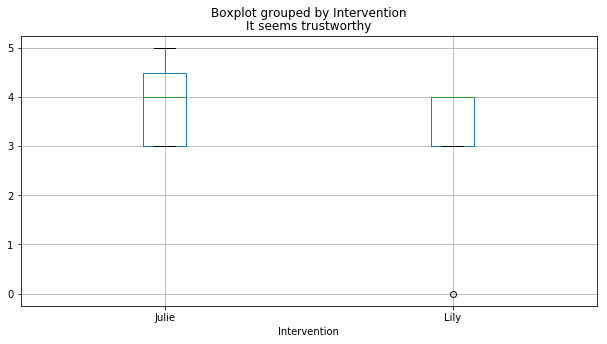

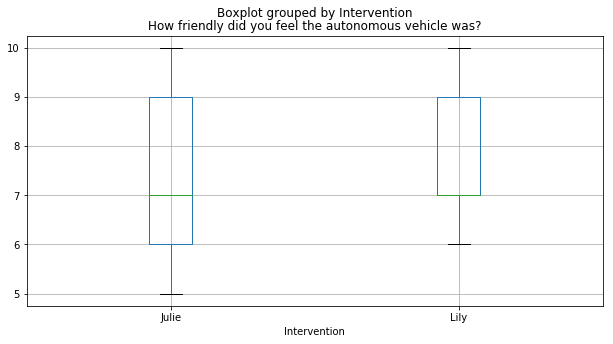

In [97]:
temp.boxplot(column=["Please rate your overall experience of riding the autonomous vehicle"], by = "Intervention", 
            figsize = [10, 5])
temp.boxplot(column=["How safe did you feel in the autonomous vehicle? "], by = "Intervention", 
            figsize = [10, 5])
temp.boxplot(column=["It seems trustworthy"], by = "Intervention", 
            figsize = [10, 5])
temp.boxplot(column=["How friendly did you feel the autonomous vehicle was?"], by = "Intervention", 
            figsize = [10, 5])

The variance is pretty well-contained within the overall range of responses. 

There were a couple questions with differing within-group variances. The questions had similar averages scores but had different variation in scores: 
* Please rate your overall experience of riding the autonomous vehicle
   * Julie: 7.7 average score, 1.4 variance
   * Lily:  7.5 average score, 4.5 variance
  
* How safe did you feel in the autonomous vehicle?
    * Julie: 6.7 average score, 6.4 variance
    * Lily:  5.9 average score, 2.7 variance

## Mann-Whitney U Test

In [14]:
import scipy
from scipy import stats

### Feedback Score Totals

In [15]:
print("Sum of Feedback scores")
x = feedback_sum[feedback_sum["Intervention"]=="Julie"]["SumFeedback"]
y = feedback_sum[feedback_sum["Intervention"]=="Lily"]["SumFeedback"]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

Sum of Feedback scores


MannwhitneyuResult(statistic=73.5, pvalue=0.40118430687307693)

No significant difference for the combined Feedback score. 

In [23]:
print("Feedback Question #1")
x = data[data["Intervention"]=="Julie"]["Feedback #1"]
y = data[data["Intervention"]=="Lily"]["Feedback #1"]
print(scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided'))

print("Feedback Question #2")
x = data[data["Intervention"]=="Julie"]["Feedback #2"]
y = data[data["Intervention"]=="Lily"]["Feedback #2"]
print(scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided'))

print("Feedback Question #3")
x = data[data["Intervention"]=="Julie"]["Feedback #3"]
y = data[data["Intervention"]=="Lily"]["Feedback #3"]
print(scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided'))

print("Feedback Question #4")
x = data[data["Intervention"]=="Julie"]["Feedback #4"]
y = data[data["Intervention"]=="Lily"]["Feedback #4"]
print(scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided'))

Feedback Question #1
MannwhitneyuResult(statistic=66.0, pvalue=0.5810872693281479)
Feedback Question #2
MannwhitneyuResult(statistic=71.5, pvalue=0.424504972218789)
Feedback Question #3
MannwhitneyuResult(statistic=83.5, pvalue=0.07983871964585261)
Feedback Question #4
MannwhitneyuResult(statistic=66.0, pvalue=0.684332786536565)


### Overall Experience of Riding in the Autonomous Vehicle

In [92]:
print("Overall Experience of Riding the Autonomous Vehicle")
x = data[data["Intervention"]=="Julie"]["Please rate your overall experience of riding the autonomous vehicle"]
y = data[data["Intervention"]=="Lily"]["Please rate your overall experience of riding the autonomous vehicle"]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

Overall Experience of Riding the Autonomous Vehicle


MannwhitneyuResult(statistic=68.0, pvalue=0.8361643332711484)

### How likely are you to ride an autonomous vehicle again?

In [93]:
print("How likely are you to ride an autonomous vehicle again?")
x = data[data["Intervention"]=="Julie"]["How likely are you to ride an autonomous vehicle again? "]
y = data[data["Intervention"]=="Lily"]["How likely are you to ride an autonomous vehicle again? "]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

How likely are you to ride an autonomous vehicle again?


MannwhitneyuResult(statistic=50.0, pvalue=0.18835623958464986)

In [39]:
print(data.columns[16])
x = data[data["Intervention"]=="Julie"][data.columns[16]]
y = data[data["Intervention"]=="Lily"][data.columns[16]]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

It is recommendable to others


MannwhitneyuResult(statistic=72.0, pvalue=0.4415281333040998)

### Comfortable, Friendly, Safe

In [40]:
print(data.columns[17])
x = data[data["Intervention"]=="Julie"][data.columns[17]]
y = data[data["Intervention"]=="Lily"][data.columns[17]]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

How comfortable were you in the autonomous vehicle


MannwhitneyuResult(statistic=72.0, pvalue=0.4415281333040998)

In [41]:
print(data.columns[18])
x = data[data["Intervention"]=="Julie"][data.columns[18]]
y = data[data["Intervention"]=="Lily"][data.columns[18]]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

How friendly did you feel the autonomous vehicle was?


MannwhitneyuResult(statistic=54.5, pvalue=0.7124093190334864)

In [42]:
print(data.columns[19])
x = data[data["Intervention"]=="Julie"][data.columns[19]]
y = data[data["Intervention"]=="Lily"][data.columns[19]]
scipy.stats.mannwhitneyu(x,y, alternative = 'two-sided')

How safe did you feel in the autonomous vehicle? 


MannwhitneyuResult(statistic=79.0, pvalue=0.2250538476374807)

None of these test results came out as statistically significant. 

In [27]:
print(data.columns[10:30])

Index(['Feedback #7',
       'Please rate your overall experience of riding the autonomous vehicle',
       'It operated as expected', 'It seems trustworthy', 'It was comforting',
       'It will drive more safely than other human drivers',
       'It is recommendable to others',
       'How comfortable were you in the autonomous vehicle',
       'How friendly did you feel the autonomous vehicle was?',
       'How safe did you feel in the autonomous vehicle? ',
       'How likely are you to ride an autonomous vehicle again? '],
      dtype='object')
